### Luke Traverso
### Data Science Programming Final Project
### Helping the Mets in Free Agency
### 18 December 2024

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
FA_Stats = pd.read_csv('FA_Stats.csv')
Team_Position_Ranks = pd.read_csv('DSP-P4-PositionCompare.csv')
Team_Stats = pd.read_csv('DSP-P4-TeamStats.csv')

### Let's first explore some of the data

In [ ]:
FA_Stats

In [ ]:
FA_Stats.describe()

In [ ]:
FA_Stats.columns

In [ ]:
FA_Stats.shape

In [ ]:
FA_Stats.dtypes

In [ ]:
FA_Stats.head()

In [ ]:
FA_Stats.tail()

In [ ]:
FA_Stats.sample()

In [ ]:
FA_Stats.info()

In [ ]:
Team_Stats

### The first thing a team has to know when entering free agency is where they need to improve
#### Using the '2024 MLB Team Position Performance by Wins Above Average' table provided by BaseballReference I wanted to see which positions the Mets were lacking production in

In [ ]:
Team_Position_Ranks

In [4]:
# clean data to make it from 'PHI15.4' into 'PHI-(15.4)'
def format_team_data(value):
    # Regular expression to match three letter team abbreviation followed by a float
    pattern = r'([A-Za-z]{3})(-?\d+\.\d+)'
    match = re.match(pattern, str(value))
    if match:
        # Format it as 'ABC-(0.0)'
        team = match.group(1)
        stat = match.group(2)
        return f"{team}-({float(stat):.1f})"
    return value  # If no match, return the value as is

# Apply the formatting to all columns of the DataFrame
TPR_True = Team_Position_Ranks.applymap(format_team_data)

/var/folders/xw/3plpy7dj6hz0_x3tx0vrqqj80000gn/T/ipykernel_10513/58866790.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  TPR_True = Team_Position_Ranks.applymap(format_team_data)


In [80]:
TPR_True

,Rk,Total,All P,SP,RP,Non-P,C,1B,2B,3B,SS,LF,CF,RF,OF (All),DH,PH
0,1,Philadelphia Phillies15.4,ATL-(12.4),KCR-(10.3),CLE-(7.7),LAD-(19.7),MIL-(2.0),PHI-(2.9),ARI-(4.1),SFG-(4.9),KCR-(7.1),BOS-(3.4),NYY-(5.4),NYY-(5.6),NYY-(10.1),LAD-(7.1),ARI-(0.9)
1,2,New York Yankees13.7,CIN-(10.9),CIN-(9.3),ATL-(3.9),ARI-(13.7),PHI-(1.9),TOR-(2.8),MIL-(2.1),CLE-(3.3),BAL-(6.8),CHC-(1.7),BOS-(4.1),HOU-(2.0),BOS-(9.4),OAK-(2.9),LAD-(0.3)
2,3,Los Angeles Dodgers12.8,SDP-(7.8),ATL-(8.6),TBR-(3.4),BAL-(11.5),LAD-(1.8),LAD-(2.5),CLE-(1.8),TOR-(2.1),NYM-(5.2),CLE-(1.6),SEA-(3.0),BOS-(1.9),SDP-(3.9),HOU-(2.6),TOR-(0.3)
3,4,Atlanta Braves12.6,KCR-(7.4),CHW-(5.8),MIL-(3.0),NYY-(10.3),STL-(1.8),ATL-(1.7),TEX-(1.7),NYM-(1.9),LAD-(3.2),MIL-(1.5),SDP-(2.3),LAD-(1.8),MIL-(3.7),ARI-(2.1),PHI-(0.2)
4,5,San Diego Padres10.0,TBR-(6.2),SDP-(5.3),SDP-(2.6),PHI-(9.4),KCR-(1.6),ARI-(0.7),CHC-(1.2),LAD-(1.7),TEX-(3.2),TEX-(1.2),TOR-(2.1),MIL-(1.1),SEA-(3.6),ATL-(2.0),SEA-(0.2)
5,6,Houston Astros9.9,PHI-(6.0),PHI-(5.3),OAK-(2.5),TOR-(7.9),SEA-(1.4),BAL-(0.7),NYM-(1.1),ATL-(1.7),LAA-(3.0),LAD-(1.0),COL-(1.8),ARI-(1.0),CHC-(3.5),PHI-(1.5),BAL-(0.0)
6,7,Milwaukee Brewers9.6,DET-(4.1),PIT-(4.6),MIA-(1.7),BOS-(7.0),HOU-(1.1),CHC-(0.6),LAD-(1.0),HOU-(1.6),CIN-(2.9),SEA-(0.9),DET-(1.7),BAL-(0.9),BAL-(2.6),NYY-(1.5),NYM-(-0.1)
7,8,Baltimore Orioles9.0,HOU-(3.7),HOU-(3.9),CIN-(1.6),HOU-(6.2),BAL-(0.9),NYM-(0.4),HOU-(0.9),PHI-(1.1),STL-(2.4),SDP-(0.9),ATL-(1.2),CHC-(0.7),DET-(2.4),CLE-(0.3),NYY-(-0.1)
8,9,Kansas City Royals8.1,MIL-(3.6),NYY-(3.7),STL-(1.6),MIL-(6.0),ARI-(0.9),TEX-(0.4),TOR-(0.8),ARI-(1.0),ARI-(2.3),DET-(0.7),BAL-(1.1),SDP-(0.7),LAD-(2.1),BAL-(0.3),WSN-(-0.2)
9,10,Boston Red Sox6.1,NYY-(3.4),BOS-(3.2),DET-(1.1),SEA-(5.6),NYY-(0.9),MIN-(0.3),PHI-(0.7),BOS-(0.9),PHI-(2.1),BAL-(0.6),MIN-(1.1),OAK-(0.6),TOR-(2.1),DET-(0.1),TEX-(-0.4)


In [6]:
# highlight/focus only on the Mets placements and data in the table
def extract_nym_value(cell):
    if isinstance(cell, str) and 'NYM' in cell:
        match = re.search(r'\(([-+]?[0-9]*\.?[0-9]+)\)', cell)
        if match:
            return float(match.group(1))
    return np.nan 

# Apply the function to the DataFrame
nym_values = TPR_True.applymap(extract_nym_value)
nym_values

/var/folders/xw/3plpy7dj6hz0_x3tx0vrqqj80000gn/T/ipykernel_10513/2704624916.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  nym_values = TPR_True.applymap(extract_nym_value)


,Rk,Total,All P,SP,RP,Non-P,C,1B,2B,3B,SS,LF,CF,RF,OF (All),DH,PH
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# remove NaN values, only get Mets numbers
clean_data = []

for idx, row in nym_values.iterrows():
    values = row.dropna()  # Get only non-NaN values
    if not values.empty:
        for col, val in values.items():
            clean_data.append({
                'Row': idx,
                'Column': col,
                'Value': val
            })

mets_positions = pd.DataFrame(clean_data)
mets_positions = mets_positions[mets_positions['Column'] != 'All P'].reset_index(drop=True)
mets_positions = mets_positions[mets_positions['Column'] != 'Non-P'].reset_index(drop=True)
# needed help from outside source on this one, wasn't sure how isolate only the values that weren't Nan
mets_positions

,Row,Column,Value
0,2,SS,5.2
1,3,3B,1.9
2,5,2B,1.1
3,6,PH,-0.1
4,7,1B,0.4
5,13,SP,2.5
6,13,OF (All),-0.7
7,14,LF,0.1
8,16,RF,-0.7
9,17,CF,-0.1


In [74]:
sorted_positions = mets_positions.sort_values(by='Value')

# Identify the 3 worst-performing positions
worst_positions = sorted_positions.head(3)
print("Worst 3 performing positions:")
print(worst_positions[['Column', 'Value']])

Worst 3 performing positions:
   Column  Value
12     RP   -5.3
10     DH   -1.4
11      C   -1.3


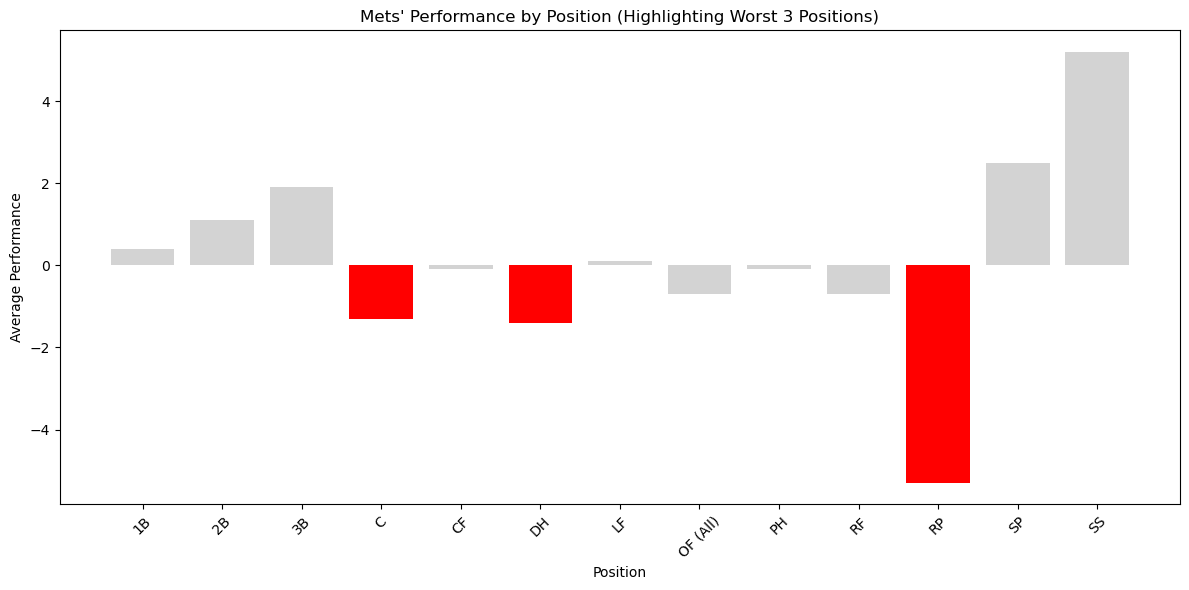

In [76]:
# Sort positions by performance
sorted_positions = mets_positions.sort_values(by='Value')

# Get the 3 worst-performing positions
worst_positions = sorted_positions.head(3)['Column'].values

# Group by position and get the average performance for each
position_avg_values = sorted_positions.groupby('Column')['Value'].mean()

# Create a color list where worst positions are red, others are light gray
colors = ['red' if position in worst_positions else 'lightgray' for position in position_avg_values.index]

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(position_avg_values.index, position_avg_values.values, color=colors)

# Add labels and title
plt.xlabel("Position")
plt.ylabel("Average Performance")
plt.title("Mets' Performance by Position (Highlighting Worst 3 Positions)")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

#### The 3 positions where the Mets need the most help/improvement are DH, Relief Pitching, and Catcher.

### Keeping in topic with where the Mets need to improve, it can also help to see how they have performed offensively this past season
#### When in search of good signings to make, it would be important to bring in players who excel in areas where the team is lacking

In [20]:
Team_Stats

,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
0,Arizona Diamondbacks,51,28.5,5.47,162,6284,5522,886,1452,271,...,0.440,0.777,115,2430,112,84,34,66,17,1111
1,Atlanta Braves,55,29.3,4.35,162,6075,5481,704,1333,273,...,0.415,0.724,100,2275,119,58,9,39,11,1088
2,Baltimore Orioles,60,26.9,4.85,162,6176,5567,786,1391,262,...,0.435,0.751,118,2424,71,64,6,45,14,1108
3,Boston Red Sox,57,27.3,4.64,162,6192,5577,751,1404,311,...,0.423,0.741,104,2357,110,73,7,40,30,1116
4,Chicago Cubs,56,27.8,4.54,162,6116,5441,736,1318,253,...,0.393,0.710,100,2139,89,70,17,41,19,1105
5,Chicago White Sox,63,27.8,3.13,162,5869,5383,507,1187,226,...,0.340,0.618,77,1830,116,43,18,27,8,1014
6,Cincinnati Reds,61,27.1,4.31,162,5970,5325,699,1230,257,...,0.388,0.693,88,2067,86,87,18,43,7,989
7,Cleveland Guardians,50,26.1,4.40,161,5927,5310,708,1263,245,...,0.395,0.703,99,2099,111,87,17,43,30,978
8,Colorado Rockies,54,27.9,4.21,162,6026,5454,682,1319,277,...,0.400,0.704,89,2183,126,51,19,45,20,1028
9,Detroit Tigers,48,26.7,4.21,162,6021,5442,682,1273,244,...,0.385,0.685,94,2097,90,52,4,41,12,1045


In [22]:
# Filter the Mets and League Average rows
mets = Team_Stats[Team_Stats['Tm'] == 'New York Mets']
league_average = Team_Stats[Team_Stats['Tm'] == 'League Average']

# Ensure that you are comparing the same columns for relevant stats
comparison_columns = ['R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB', 'GDP', 'HBP', 'SH', 'SF','LOB']

# Subtract the league averages from the Mets stats to compare
comparison = mets[comparison_columns].reset_index(drop=True) - league_average[comparison_columns].reset_index(drop=True)
comparison

,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,LOB
0,57,30,20,-8,25,56,-15,-10,16,9,...,0.007,0.016,0.023,8,109,-3,25,-5,-6,31


In [24]:
# Sort the comparison values in ascending order (most negative = worst performing)
sorted_comparison = comparison.T.sort_values(by=0).head(5)
sorted_comparison

,0
SB,-15.0
CS,-10.0
3B,-8.0
SF,-6.0
SH,-5.0


/var/folders/xw/3plpy7dj6hz0_x3tx0vrqqj80000gn/T/ipykernel_10513/3680845889.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=comparison.columns, y=comparison.iloc[0], palette=colors)


<Figure size 1200x800 with 0 Axes>

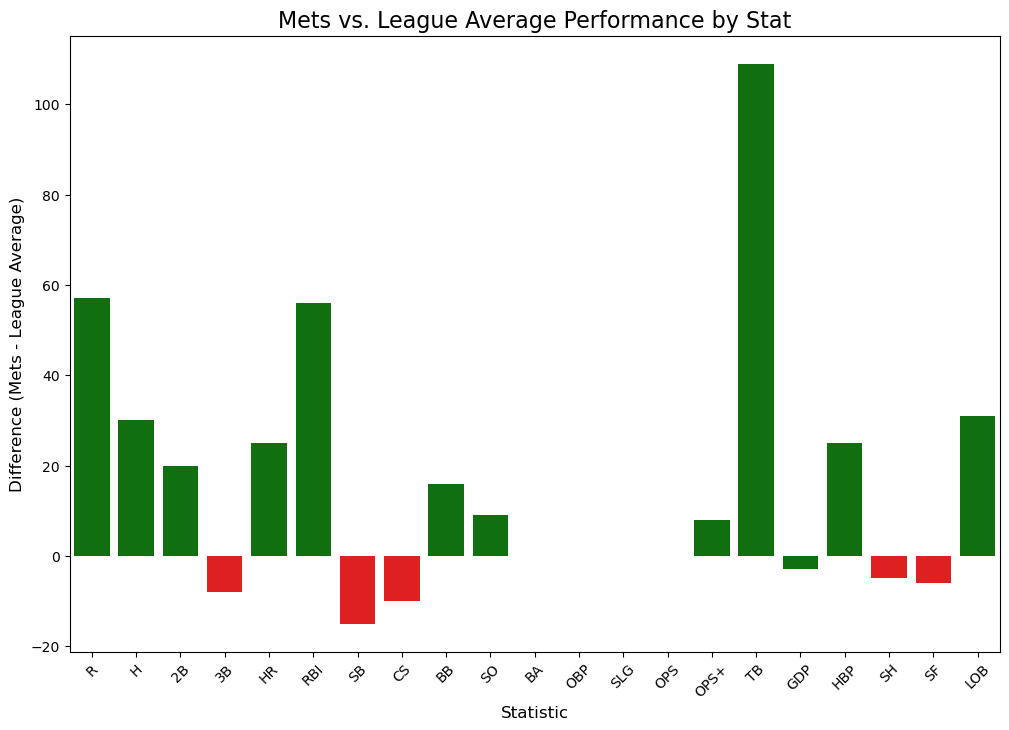

In [30]:
# Create a Seaborn bar plot for all stats
plt.figure(figsize=(12, 8))

# Create a list of colors: red for the worst 5 stats, green for the others
colors = ['red' if stat in sorted_comparison.index else 'green' for stat in comparison.columns]

# Create a Seaborn bar plot for all stats with customized colors
plt.figure(figsize=(12, 8))

# Plot all stats with the color list
sns.barplot(x=comparison.columns, y=comparison.iloc[0], palette=colors)

# Add labels and title
plt.title('Mets vs. League Average Performance by Stat', fontsize=16)
plt.xlabel('Statistic', fontsize=12)
plt.ylabel('Difference (Mets - League Average)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

### Now we want to know which player would add the most value to the team if signed, how many players are actually worth signing, and who offers the best combination of age and performance.
#### Knowing that the Mets aren't the best in Triples and Stolen Bases it could help to search for players that can provide help in that area. Even areas in where they are neutral in could be a place to look to improve (OBP, OPS, BA, etc.). 

In [ ]:
FA_Stats

In [32]:
# To clean this up quickly and easily, we will remove any player that has had a negative/negligable WAR3 value
FAS_True = FA_Stats[FA_Stats['WAR3'] >= 2.5]
FAS_True

,Rk,Name,Age,From Team,WAR3,G,PA,AB,R,H,...,SB,CS,BB,SO,BA,OBP,SLG,OPS,Pos,Name-additional
0,1,Juan Soto,26,NYY,18.9,936,4088,3280,655,934,...,57,23,769,696,0.285,0.421,0.532,0.953,OF,sotoju01
1,2,Alex Bregman,31,HOU,13.6,1111,4832,4157,694,1132,...,42,14,576,646,0.272,0.366,0.483,0.848,3B-SS,bregmal01
2,3,Ha-Seong Kim,29,SDP,13.2,540,1976,1725,229,418,...,78,17,206,372,0.242,0.326,0.380,0.706,SS-2B-3B,kimha01
3,4,Paul Goldschmidt,37,STL,12.3,1928,8292,7119,1204,2056,...,169,35,1050,1879,0.289,0.381,0.510,0.892,1B-DH,goldspa01
4,5,Christian Walker,34,ARI,11.4,832,3270,2880,427,720,...,25,6,318,742,0.250,0.330,0.463,0.793,1B-DH,walkech02
5,6,Willy Adames,29,MIL,10.4,880,3610,3227,467,800,...,51,22,348,982,0.248,0.322,0.444,0.766,SS,adamewi01
6,7,Pete Alonso,30,NYM,10.2,846,3607,3139,493,781,...,17,2,358,822,0.249,0.339,0.514,0.854,1B-DH,alonspe01
7,8,Teoscar Hernández,32,LAD,9.2,965,3861,3534,506,928,...,54,24,278,1142,0.263,0.320,0.488,0.808,OF-DH,hernate01
8,9,Gleyber Torres,28,NYY,8.7,888,3673,3281,460,870,...,53,24,333,746,0.265,0.334,0.441,0.774,2B-SS,torregl01
9,10,Anthony Santander,30,BAL,8.3,746,3115,2830,383,695,...,10,7,226,644,0.246,0.307,0.469,0.776,OF-DH,santaan02


In [34]:
# Focus on players with high SB and 3B
need_help = FAS_True[(FAS_True['SB'] >= 50) | (FAS_True['3B'] >= 10)]

# Also consider players with strong OBP, OPS, or BA
could_help = FAS_True[(FAS_True['OBP'] >= 0.360) | (FAS_True['OPS'] >= 0.870) | (FAS_True['BA'] >= 0.270)]

# Display the 'need help' first
need_help[['Name', 'WAR3', 'SB', '3B', 'OBP', 'OPS', 'BA','Pos']]

,Name,WAR3,SB,3B,OBP,OPS,BA,Pos
0,Juan Soto,18.9,57,15,0.421,0.953,0.285,OF
1,Alex Bregman,13.6,42,18,0.366,0.848,0.272,3B-SS
2,Ha-Seong Kim,13.2,78,8,0.326,0.706,0.242,SS-2B-3B
3,Paul Goldschmidt,12.3,169,23,0.381,0.892,0.289,1B-DH
5,Willy Adames,10.4,51,5,0.322,0.766,0.248,SS
7,Teoscar Hernández,9.2,54,14,0.320,0.808,0.263,OF-DH
8,Gleyber Torres,8.7,53,4,0.334,0.774,0.265,2B-SS
10,Carlos Santana,6.3,58,17,0.354,0.785,0.242,1B-C-DH-3B
11,Jorge Polanco,6.0,55,20,0.330,0.765,0.263,SS-2B-DH
12,Michael A. Taylor,6.0,120,14,0.290,0.671,0.235,OF


In [36]:
could_help[['Name', 'WAR3', 'SB', '3B', 'OBP', 'OPS', 'BA','Pos']]

,Name,WAR3,SB,3B,OBP,OPS,BA,Pos
0,Juan Soto,18.9,57,15,0.421,0.953,0.285,OF
1,Alex Bregman,13.6,42,18,0.366,0.848,0.272,3B-SS
3,Paul Goldschmidt,12.3,169,23,0.381,0.892,0.289,1B-DH
15,Justin Turner,5.9,45,9,0.363,0.821,0.285,3B-DH-2B-1B-SS
24,Amed Rosario,4.6,109,46,0.308,0.706,0.273,SS-2B-OF-DH
25,Alex Verdugo,4.6,22,11,0.328,0.742,0.272,OF
26,Gio Urshela,4.5,7,8,0.316,0.729,0.273,3B-SS-1B
27,Jose Iglesias,4.3,65,15,0.323,0.710,0.283,SS-2B-3B
31,Donovan Solano,3.6,15,9,0.335,0.716,0.279,2B-1B-3B-DH-SS
33,J.D. Martinez,3.5,26,24,0.348,0.863,0.283,OF-DH


#### Let's see if there is any players that fill out all of the requirements

In [39]:
# Combine to find players meeting *all* criteria across both groups
potential_signing = FAS_True[
    (FAS_True['SB'] >= 50) & 
    (FAS_True['3B'] >= 10) & 
    (FAS_True['OBP'] >= 0.350) & 
    (FAS_True['OPS'] >= 0.850) & 
    (FAS_True['BA'] >= 0.270)
]

# Sort these players by WAR3 to prioritize top performers
signing = potential_signing.sort_values(by='WAR3', ascending=False)

# Display the players who meet *all* the requirements
print(signing[['Name', 'WAR3', 'SB', '3B', 'OBP', 'OPS', 'BA', 'Pos']])

               Name  WAR3   SB  3B    OBP    OPS     BA    Pos
0         Juan Soto  18.9   57  15  0.421  0.953  0.285     OF
3  Paul Goldschmidt  12.3  169  23  0.381  0.892  0.289  1B-DH


#### It seems that the two best overall candidates in this free agency class that fulfill the Mets potential needs are Juan Soto and Paul Goldschmidt

### In keeping focus on improving the Mets offensively, let's look for possible signings in positions where the Mets didn't have too much success (Catcher, Outfield)

In [52]:
# Filter for players in Catcher (C) or Outfield (OF) positions
positional_candidates = FAS_True[FAS_True['Pos'].str.contains('C|OF')]

# Sort by WAR3 in descending order to find the top-performing players
top_by_position = positional_candidates.sort_values(by='WAR3', ascending=False)

# Display the top candidates with relevant stats
relevant_columns = ['Name', 'Age', 'From Team', 'WAR3', 'G', 'PA', 'OPS', 'SLG', 'OBP', 'Pos']
top_by_position[relevant_columns]


,Name,Age,From Team,WAR3,G,PA,OPS,SLG,OBP,Pos
0,Juan Soto,26,NYY,18.9,936,4088,0.953,0.532,0.421,OF
7,Teoscar Hernández,32,LAD,9.2,965,3861,0.808,0.488,0.320,OF-DH
9,Anthony Santander,30,BAL,8.3,746,3115,0.776,0.469,0.307,OF-DH
10,Carlos Santana,39,MIN,6.3,2080,8780,0.785,0.431,0.354,1B-C-DH-3B
12,Michael A. Taylor,34,PIT,6.0,1082,3476,0.671,0.381,0.290,OF
13,Max Kepler,32,MIN,5.9,1072,4251,0.746,0.429,0.318,OF
14,Kevin Kiermaier,35,LAD,5.9,1159,4040,0.706,0.402,0.304,OF
17,Josh Rojas,31,SEA,5.6,569,2113,0.685,0.362,0.323,3B-2B-OF-SS
18,Jon Berti,35,NYY,5.5,461,1624,0.703,0.366,0.337,3B-2B-SS-OF
19,Mark Canha,36,SFG,5.2,1049,4003,0.763,0.414,0.349,OF-1B-DH


/var/folders/xw/3plpy7dj6hz0_x3tx0vrqqj80000gn/T/ipykernel_10513/2559815345.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='WAR3', y='Name', data=top_by_position, palette='viridis', order=top_by_position.sort_values('WAR3', ascending=False)['Name'])


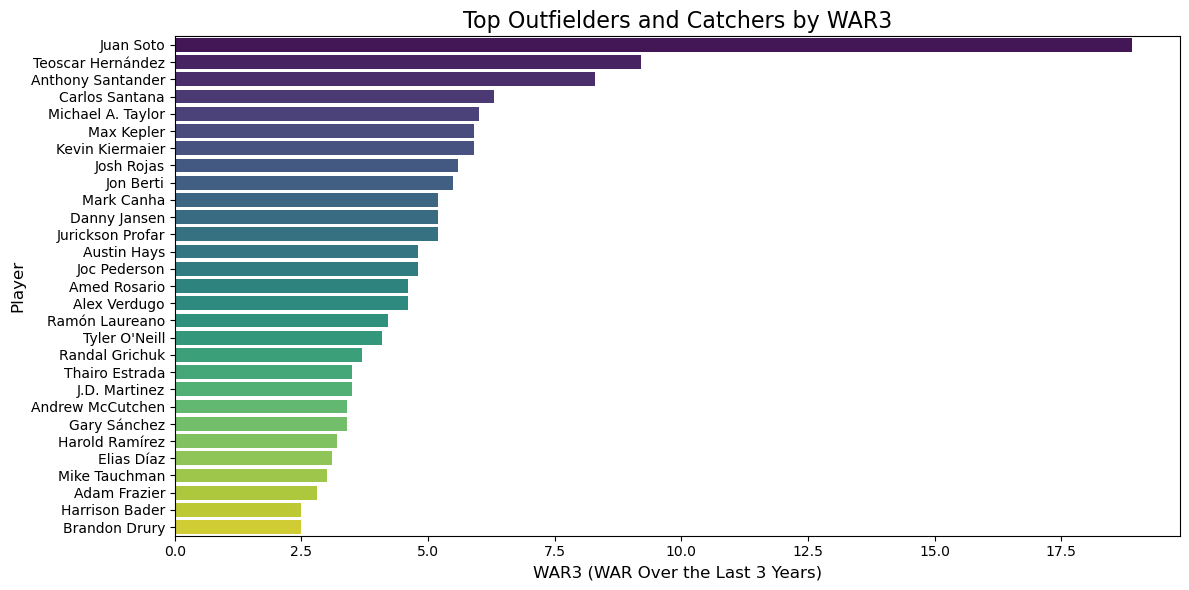

In [86]:
# Bar Chart: WAR3 by Player
plt.figure(figsize=(12, 6))
sns.barplot(x='WAR3', y='Name', data=top_by_position, palette='viridis', order=top_by_position.sort_values('WAR3', ascending=False)['Name'])
plt.title('Top Outfielders and Catchers by WAR3', fontsize=16)
plt.xlabel('WAR3 (WAR Over the Last 3 Years)', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.tight_layout()
plt.show()

### To focus on long-term impact, lets find out how strong the correlation between player age and recent performance is in free agency.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


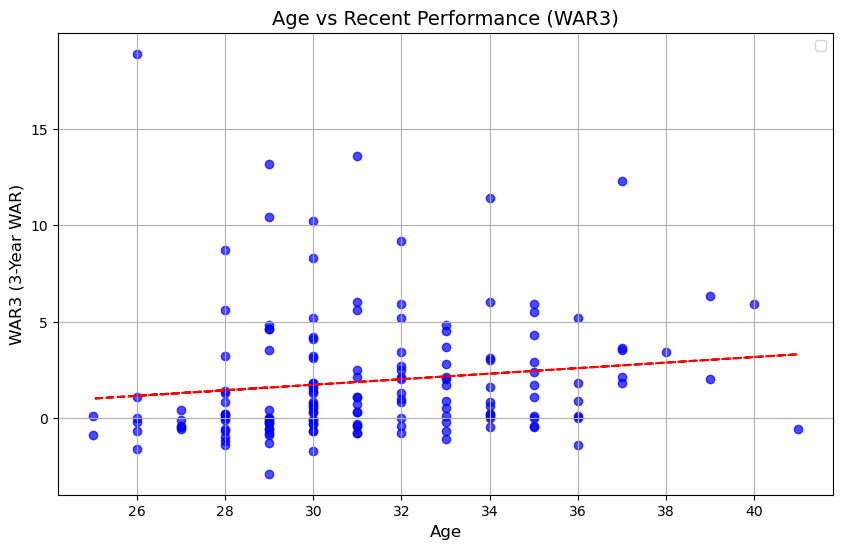

In [84]:
# Scatter plot of Age vs WAR3
plt.figure(figsize=(10, 6))
plt.scatter(FA_Stats['Age'], FA_Stats['WAR3'], alpha=0.7, color='blue')
plt.title('Age vs Recent Performance (WAR3)', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('WAR3 (3-Year WAR)', fontsize=12)
plt.grid(True)

# Add a trendline
z = np.polyfit(FA_Stats['Age'], FA_Stats['WAR3'], 1)
p = np.poly1d(z)
plt.plot(FA_Stats['Age'], p(FA_Stats['Age']), "r--")

plt.legend()
plt.show()

In [43]:
correlation, p_value = pearsonr(FA_Stats['Age'], FA_Stats['WAR3'])
print(f"Correlation Coefficient: {correlation:.2f}")
if abs(correlation) > 0.5:
    print("There is a strong correlation between age and WAR3.")
elif abs(correlation) > 0.3:
    print("There is a moderate correlation between age and WAR3.")
else:
    print("There is little to no correlation between age and WAR3.")

Correlation Coefficient: 0.14
There is little to no correlation between age and WAR3.


#### There doesn't seem to be much of a relationship beteween a players age and how he has performed over the past 3 seasons.